In [7]:
import zipfile
import os

# Assuming the zip file is uploaded to the current directory
zip_path = '/content/titanic.zip'

# Directory where the files will be extracted
extract_dir = '/content/titanic'

# Ensure the extraction directory exists
os.makedirs(extract_dir, exist_ok=True)

# Extract the contents
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f'Files extracted to {extract_dir}')


Files extracted to /content/titanic


In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
import pylab
import scipy.stats as stats
import datetime
%matplotlib inline

pd.set_option('display.max_columns', None)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [3]:
# ignore warnings

import warnings
warnings.filterwarnings('ignore')

In [9]:
# load the dataset
titanic = pd.read_csv('/content/titanic/train.csv')

In [10]:
# make a copy of titanic dataset
data1 = titanic.copy()

In [11]:
 # check the percentage of missing values per variable

data1.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [12]:
# check how many observations we would drop
print('total passengers with values in all variables: ', data1.dropna().shape[0])
print('total passengers in the Titanic: ', data1.shape[0])
print('percentage of data without missing values: ', data1.dropna().shape[0]/ np.float64(data1.shape[0]))

total passengers with values in all variables:  183
total passengers in the Titanic:  891
percentage of data without missing values:  0.2053872053872054


In [13]:
# make a copy of titanic dataset
data2 = titanic.copy()

In [14]:
# check the percentage of NA values in dataset

data2.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

Text(0.5, 0, 'Age')

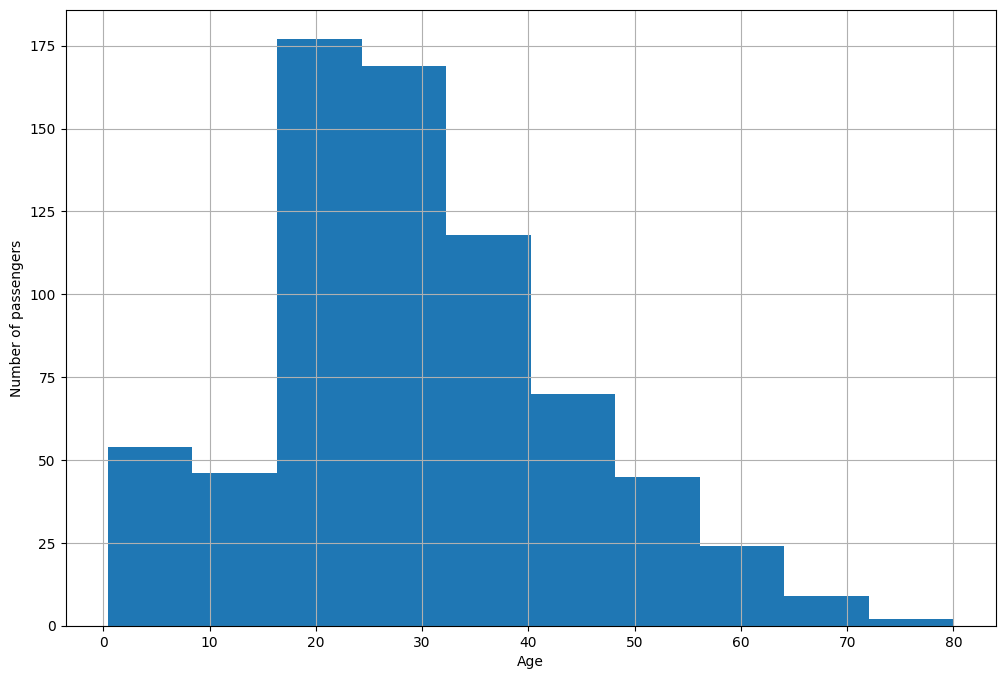

In [15]:
# plot the distribution of age to find out if they are Gaussian or skewed.

plt.figure(figsize=(12,8))
fig = data2.Age.hist(bins=10)
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Age')

In [16]:
# separate dataset into training and testing set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data2, data2.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 12), (268, 12))

In [17]:
# calculate median of Age
median = X_train.Age.median()
median

29.0

In [18]:
# impute missing values in age in train and test set

for df in [X_train, X_test]:
    df['Age'].fillna(median, inplace=True)

In [19]:
X_train['Age'].isnull().sum()

0

In [20]:
X_test['Age'].isnull().sum()

0

In [21]:
# make a copy of titanic dataset

data3 = titanic.copy()

In [22]:
# check the percentage of NA values

data3.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [23]:
# separate dataset into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data3, data3.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 12), (268, 12))

In [24]:
# write a function to create 3 variables from Age:

def impute_na(df, variable, median):

    df[variable+'_median'] = df[variable].fillna(median)
    df[variable+'_zero'] = df[variable].fillna(0)

    # random sampling
    df[variable+'_random'] = df[variable]

    # extract the random sample to fill the na
    random_sample = X_train[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)

    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample

    # fill with random-sample
    df[variable+'_random_sample'] = df[variable].fillna(random_sample)

In [25]:
impute_na(X_train, 'Age', median)

In [26]:
impute_na(X_test, 'Age', median)

In [27]:
# make a copy of titanic dataset

data4 = titanic.copy()

In [28]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data4, data4.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 12), (268, 12))

In [29]:
def impute_na(df, variable):
    df[variable+'_zero'] = df[variable].fillna(0)
    df[variable+'_hundred']= df[variable].fillna(100)

In [30]:
# replace NA with the median value in the training and test set
impute_na(X_train, 'Age')
impute_na(X_test, 'Age')

In [31]:
# make a copy of titanic dataset

data5 = titanic.copy()

In [32]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data5, data5.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 12), (268, 12))

<Axes: >

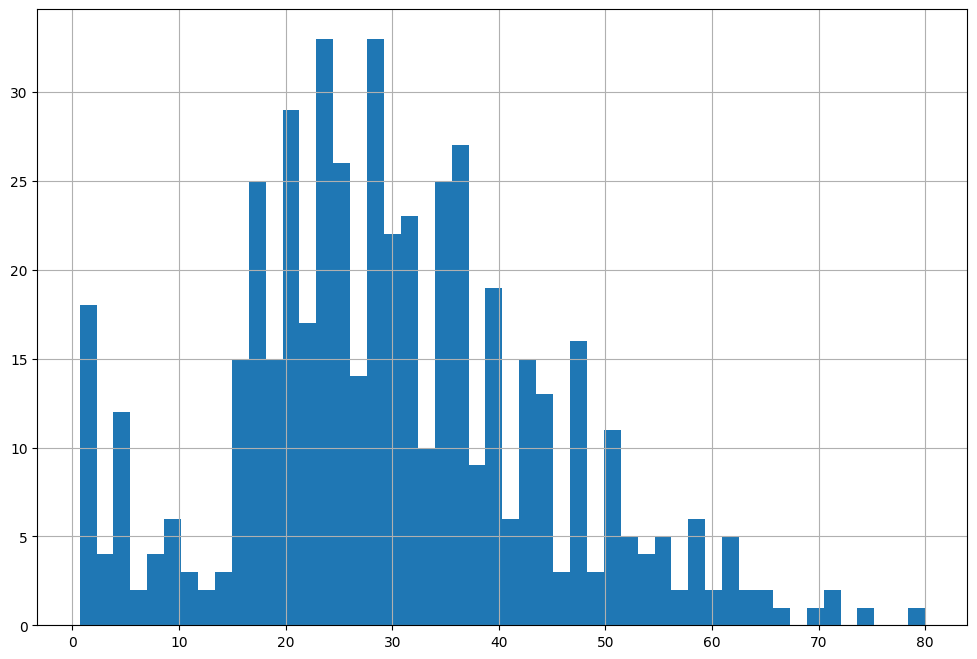

In [33]:
plt.figure(figsize=(12,8))
X_train.Age.hist(bins=50)

In [34]:
# at far end of the distribution
X_train.Age.mean()+3*X_train.Age.std()

73.43632005918369

In [39]:
# we can see that there are a few outliers for Age
# according to its distribution, these outliers will be masked when we replace NA by values at the far end

plt.figure(figsize=(12,8))
sns.boxplot('Age', data=X_train.Age)

TypeError: boxplot() got multiple values for argument 'data'

<Figure size 1200x800 with 0 Axes>

In [40]:
def impute_na(df, variable, median, extreme):
    df[variable+'_far_end'] = df[variable].fillna(extreme)
    df[variable].fillna(median, inplace=True)

In [41]:
# let's replace the NA with the median value in the training and testing sets
impute_na(X_train, 'Age', X_train.Age.median(), X_train.Age.mean()+3*X_train.Age.std())
impute_na(X_test, 'Age', X_train.Age.median(), X_train.Age.mean()+3*X_train.Age.std())

In [42]:
# make a copy of titanic dataset

data6 = titanic.copy()

In [43]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data6, data6.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 12), (268, 12))

In [44]:
# create variable indicating missingness

X_train['Age_NA'] = np.where(X_train['Age'].isnull(), 1, 0)
X_test['Age_NA'] = np.where(X_test['Age'].isnull(), 1, 0)

X_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_NA
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,0
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S,0
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S,0
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,1


In [45]:
# we can see that mean and median are similar. So I will replace with the median

X_train.Age.mean(), X_train.Age.median()

(29.915338645418327, 29.0)

In [46]:
# let's replace the NA with the median value in the training set
X_train['Age'].fillna(X_train.Age.median(), inplace=True)
X_test['Age'].fillna(X_train.Age.median(), inplace=True)

X_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_NA
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,0
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S,0
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S,0
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,29.0,1,0,2689,14.4583,NaN,C,1
549,550,1,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S,0
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,0
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,0
157,158,0,3,"Corn, Mr. Harry",male,30.0,0,0,SOTON/OQ 392090,8.0500,NaN,S,0
127,128,1,3,"Madsen, Mr. Fridtjof Arne",male,24.0,0,0,C 17369,7.1417,NaN,S,0


Conclusion - When to use each imputation method
If missing values are less than 5% of the variable, then go for mean/median imputation or random sample replacement. Impute by most frequent category if missing values are more than 5% of the variable. Do mean/median imputation+adding an additional binary variable to capture missingness add a 'Missing' label in categorical variables.

If the number of NA in a variable is small, they are unlikely to have a strong impact on the variable / target that you are trying to predict. Therefore, treating them specially, will most certainly add noise to the variables. Therefore, it is more useful to replace by mean/random sample to preserve the variable distribution.

If the variable / target you are trying to predict is however highly unbalanced, then it might be the case that this small number of NA are indeed informative.

In [49]:
# One-Hot encoding (OHE)

# Ordinal encoding

# Count and Frequency encoding

# Target encoding / Mean encoding

# Weight of Evidence

# Rare label encoding

In [47]:
# make a copy of titanic dataset

data7 = titanic.copy()

In [48]:
data7['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [50]:
# one hot encoding

pd.get_dummies(data7['Sex']).head()

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


In [51]:
# for better visualisation
pd.concat([data7['Sex'], pd.get_dummies(data7['Sex'])], axis=1).head()

,Sex,female,male
0,male,False,True
1,female,True,False
2,female,True,False
3,female,True,False
4,male,False,True


In [ ]:
# obtaining k-1 labels
pd.get_dummies(data7['Sex'], drop_first=True).head()

In [ ]:
# Let's now look at an example with more than 2 labels

data7['Embarked'].head()

In [ ]:
# check the number of different labels
data7.Embarked.unique()

In [ ]:
# get whole set of dummy variables

pd.get_dummies(data7['Embarked']).head()

In [ ]:
# get k-1 dummy variables

pd.get_dummies(data7['Embarked'], drop_first=True).head()

In [ ]:
#import dataset
df_train = pd.read_csv('/kaggle/input/mercedesbenz-greener-manufacturing/train.csv')


df_test = pd.read_csv('/kaggle/input/mercedesbenz-greener-manufacturing/test.csv')

In [ ]:
df_train.head()

In [ ]:
# let's have a look at how many labels

for col in df_train.columns[3:9]:
    print(col, ': ', len(df_train[col].unique()), ' labels')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_train[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']], df_train.y,
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

In [ ]:
# let's obtain the counts for each one of the labels in variable X2
# let's capture this in a dictionary that we can use to re-map the labels

X_train.X2.value_counts().to_dict()

In [ ]:
# lets look at X_train so we can compare then the variable re-coding

X_train.head()

In [ ]:
# now let's replace each label in X2 by its count

# first we make a dictionary that maps each label to the counts
X_frequency_map = X_train.X2.value_counts().to_dict()

# and now we replace X2 labels both in train and test set with the same map
X_train.X2 = X_train.X2.map(X_frequency_map)
X_test.X2 = X_test.X2.map(X_frequency_map)

X_train.head()